<a href="https://colab.research.google.com/github/Rossel/DataQuest_Courses/blob/master/027__Color_Layout_and_Annotations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COURSE 3/6: STORYTELLING THROUGH DATA VISUALIZATION

# MISSION 2: Color, Layout, and Annotations

In this mission, we will explore how to use color, spacing, and weights to further enhance the storytelling capability of the plots.

## 1. Introduction

In the previous mission, we learned some basic techniques and principles for making our plots more aesthetic. In this mission, we'll focus more directly on customizing colors, line widths, layout, and annotations to improve the ability for a viewer to extract insights from the charts. We'll continue to use the same data set containing the percentage of bachelor's degrees granted to women from 1970 to 2012

We've gone ahead and read the data set into a DataFrame named `women_degrees`. We've also brought over the code we wrote at the end of the previous mission to generate line charts for four STEM degree categories. If it's been a while since you completed the last mission, spend some time getting familiar with the data set and the charts we generated.

In [1]:
# Import functions from Google modules into Colaboratory
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [2]:
# Insert file id from Google Drive shareable link:
# https://drive.google.com/file/d/1A2UzTX9SJLcy9yMhuvsO4YjGNaM4Yw18/view?usp=sharing
id = '1A2UzTX9SJLcy9yMhuvsO4YjGNaM4Yw18'

In [3]:
# Download the dataset
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('percent-bachelors-degrees-women-usa.csv')

In [4]:
# Import pandas library and pyplot
import pandas as pd
import matplotlib.pyplot as plt

# Read csv
women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')

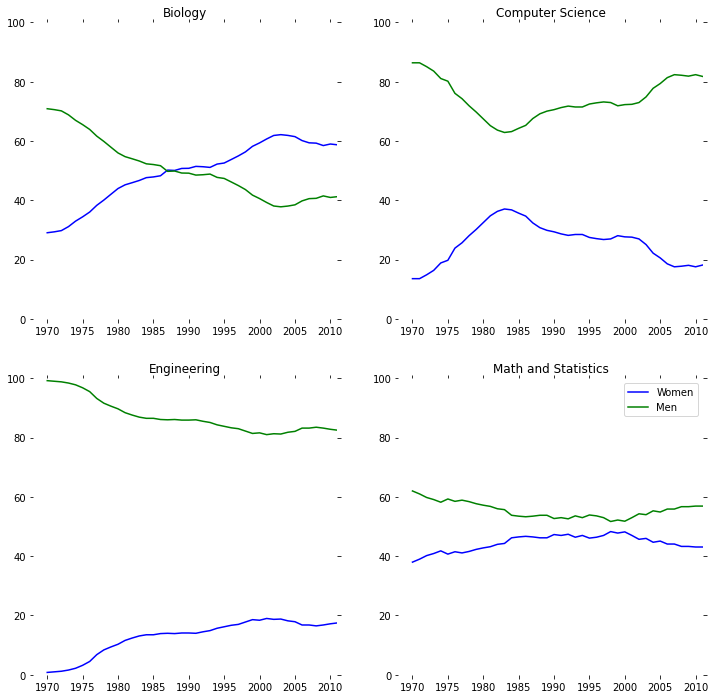

In [5]:
# Determine the major categories of specialization
major_cats = ['Biology', 'Computer Science', 'Engineering', 'Math and Statistics']

# Create a figure assigned to fig
fig = plt.figure(figsize=(12, 12))

# Loop through the 4 major categories
for sp in range(0,4):
    ax = fig.add_subplot(2,2,sp+1)
    # Generate a line chart of the percentage of Biology degrees awarded to women
    ax.plot(women_degrees['Year'], women_degrees[major_cats[sp]], c='blue', label='Women')
    # Generate a line chart of the percentage of Biology degrees awarded to men
    ax.plot(women_degrees['Year'], 100-women_degrees[major_cats[sp]], c='green', label='Men')
    # Remove all of the axis tick marks
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    # Set the x-axis limit 
    ax.set_xlim(1968, 2011)
    # Set the y-axis limit 
    ax.set_ylim(0,100)
    # Set the title of the chart
    ax.set_title(major_cats[sp])
    # Remove all of the tick marks
    ax.tick_params(bottom="off", top="off", left="off", right="off")

# Generate a legend and place it in the "upper right" location
plt.legend(loc='upper right')

# Display the plot
plt.show()

## 2. Color

So far, we've been using the [default matplotlib colors](http://matplotlib.org/api/colors_api.html#module-matplotlib.colors) to color the lines in line charts. When selecting colors, we need to be mindful of people who have some amount of color blindness. People who have color blindness have a decreased ability to distinguish between certain kinds of colors. The most common form of color blindness is red-green color blindness, where the person can't distinguish between red and green shades. Approximately 8% of men and 0.5% of women of Northern European descent suffer from red-green color blindness.

The [Ishihara test](https://en.wikipedia.org/wiki/Ishihara_test) is a well known test for color blindness, where the person is asked to identify the number in the following image:

![alt text](https://s3.amazonaws.com/dq-content/ishihara_test.png)

People with complete color vision can observe the number 74. Some with partial color blindness see the number 21 instead and those with full color blindness can't see any number at all.

If we wanted to publish the data visualizations we create, we need to be mindful of color blindness. Thankfully, there are color palettes we can use that are friendly for people with color blindness. One of them is called **Color Blind 10** and was released by Tableau, the company that makes the data visualization platform of the same name. Navigate to [this page](http://tableaufriction.blogspot.ro/2012/11/finally-you-can-use-tableau-data-colors.html) and select just the Color Blind 10 option from the list of palettes to see the ten colors included in the palette.

## 3. Setting Line Color Using RGB

The Color Blind 10 palette contains ten colors that are colorblind friendly. Let's use the first two colors in the palette for the line colors in our charts. You'll notice that next to each color strip are three integer values, separated by periods (`.`):
![alt text](https://s3.amazonaws.com/dq-content/tableau_rgb_values.png)
These numbers represent the RGB values for each color. The [RGB color model](https://en.wikipedia.org/wiki/RGB_color_model) describes how the three primary colors (red, green, and blue) can be combined in different proportions to form any secondary color. The RGB color model is very familiar to people who work in photography, filmography, graphic design, and any field that use colors extensively. In computers, each RGB value can range between 0 and 255. This is because 256 integer values can be represented using 8 bits. You can read more about 8-bit color [here](https://en.wikipedia.org/wiki/8-bit_color).

The first color in the palette is a color that resembles dark blue and has the following RGB values:

- Red: `0`
- Green: `107`
- Blue: `164`

To specify a line color using RGB values, we pass in a tuple of the values to the `c` parameter when we generate the line chart. Matplotlib expects each value to be scaled down and to range between 0 and 1 (not 0 and 255). In the following code, we scale the first color, which resembles dark blue, in the Color Blind 10 palette and set it as the line color:
```
cb_dark_blue = (0/255,107/255,164/255)
ax.plot(women_degrees['Year'], women_degrees['Biology'], 
label='Women', c=cb_dark_blue)
```

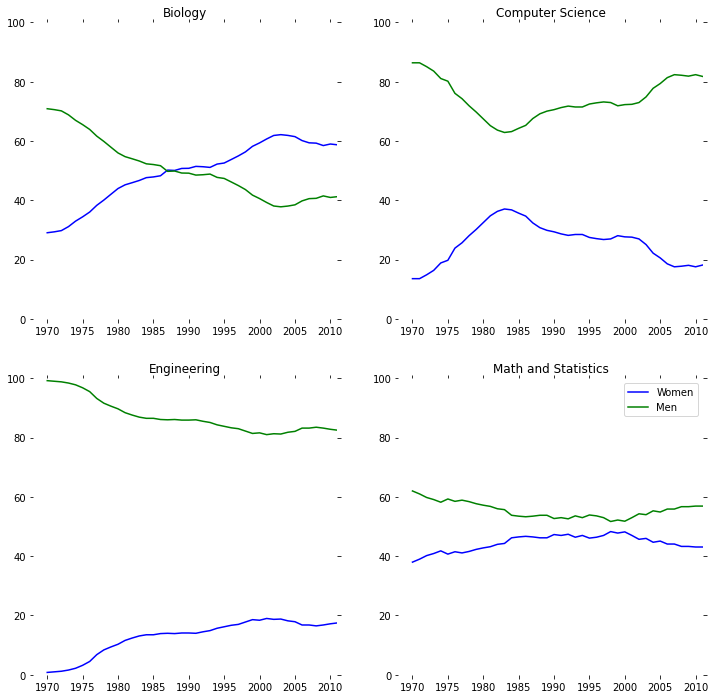

In [6]:
major_cats = ['Biology', 'Computer Science', 'Engineering', 'Math and Statistics']

# Define the RGB values from the Colour Blind 10 palette 
cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255,128/255,14/255)

fig = plt.figure(figsize=(12, 12))

for sp in range(0,4):
    ax = fig.add_subplot(2,2,sp+1)
# Set the line color for the women percentages to colour blind dark blue
    ax.plot(women_degrees['Year'], women_degrees[major_cats[sp]], c='blue', label='Women')
# Set the line color for the men percentages to colour blind orange
    ax.plot(women_degrees['Year'], 100-women_degrees[major_cats[sp]], c='green', label='Men')
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(major_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off")

plt.legend(loc='upper right')

plt.show()

## 4. Setting Line Width

By default, the actual lines reflecting the underlying data in the line charts we've been generating are quite thin. The white color in the blank area in the line charts is still a dominating color. To emphasize the lines in the plots, we can increase the width of each line. Increasing the line width also improves the data-ink ratio a little bit, because more of the chart area is used to showcase the data.

When we call the `Axes.plot()` method, we can use the `linewidth` parameter to specify the line width. Matplotlib expects a float value for this parameter:
```
ax.plot(women_degrees['Year'], women_degrees['Biology'], 
label='Women', c=cb_dark_blue, linewidth=2)
```
The higher the line width, the thicker each line will be.



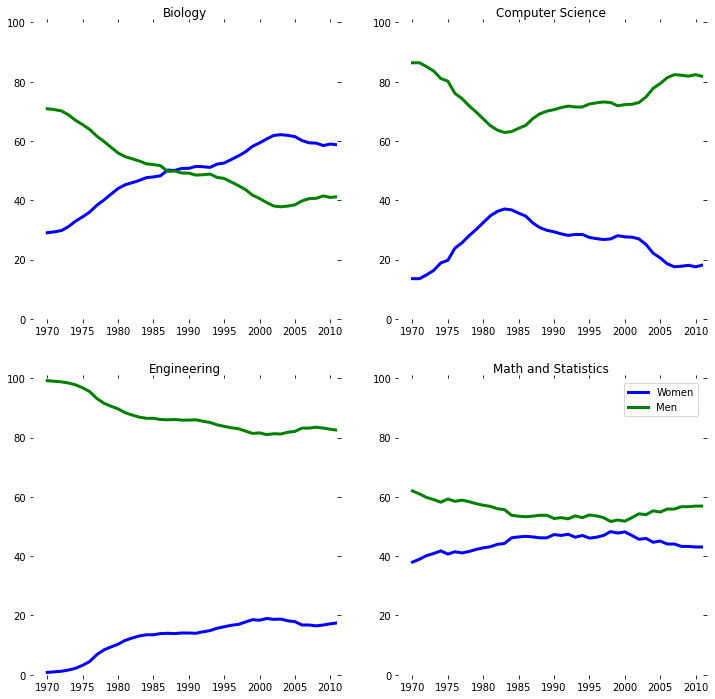

In [7]:
major_cats = ['Biology', 'Computer Science', 'Engineering', 'Math and Statistics']

cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255,128/255,14/255)

fig = plt.figure(figsize=(12, 12))

for sp in range(0,4):
    ax = fig.add_subplot(2,2,sp+1)
# Set the line with to 3
    ax.plot(women_degrees['Year'], women_degrees[major_cats[sp]], c='blue', label='Women', linewidth=3)
# Set the line with to 3
    ax.plot(women_degrees['Year'], 100-women_degrees[major_cats[sp]], c='green', label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(major_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off")

plt.legend(loc='upper right')

plt.show()

## 5. Improve the Layout and Ordering

So far, we've been generating our line charts on a 2 by 2 subplot grid. If we wanted to visualize all six STEM degrees, we'd need to either add a new column or a new row. Unfortunately, neither solution orders the plots in a beneficial way to the viewer. By scanning horizontally or vertically, a viewer isn't able to learn any new information and this can cause some frustration as the viewer's gaze jumps around the image.

To make the viewing experience more coherent, we can:

- use layout of a single row with multiple columns
- order the plots in decreasing order of initial gender gap

Here's what that would look like:
![alt text](https://s3.amazonaws.com/dq-content/line_charts_dec_initial_gg.png)


The leftmost plot has the largest gender gap in 1968 while the rightmost plot has the smallest gender gap in 1968. If we're instead interested in the recent gender gaps in STEM degrees, we can order the plots from largest to smallest ending gender gaps. Here's what that would look like:
![alt text](https://s3.amazonaws.com/dq-content/line_charts_dec_ending_gg.png)
In this exercise, you'll order the charts by decreasing ending gender gap. We've populated the list `stem_cats` with the six STEM degree categories, ordering them by decreasing ending gender gap. In the next step, we'll explore how we can replace the legend, which is currently overlapping with the rightmost line chart.

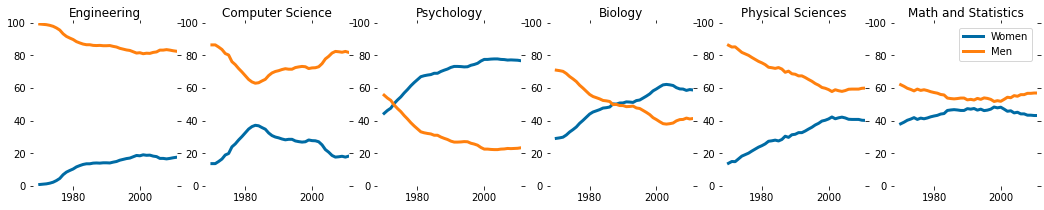

In [8]:
stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']

# Change the widt of the figur to 18 by 3 inches (w x h)
fig = plt.figure(figsize=(18, 3))

# Change the loop to a range of 0 to 6
for sp in range(0,6):
    # Change the subplot layout from 2 x 2 to 1 x 6 columns
    ax = fig.add_subplot(1,6,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off")

plt.legend(loc='upper right')
plt.show()

## 6. Replacing the Legend With Annotations

The purpose of a legend is to ascribe meaning to symbols or colors in a chart. We're using it to inform the viewer of what gender corresponds to each color. Tufte encourages removing legends entirely if the same information can be conveyed in a cleaner way. Legends consist of non-data ink and take up precious space that could be used for the visualizations themselves (data-ink).

Instead of trying to move the legend to a better location, we can replace it entirely by annotating the lines directly with the corresponding genders:

![alt text](https://s3.amazonaws.com/dq-content/annotated_legend.png)

If you notice, even the position of the text annotations have meaning. In both plots, the annotation for `Men` is positioned above the orange line while the annotation for `Women` is positioned below the dark blue line. This positioning subtly suggests that men are a majority for the degree categories the line charts are representing (`Engineering` and `Math and Statistics`) and women are a minority for those degree categories.

Combined, these two observations suggest that we should stick with annotating just the leftmost and the rightmost line charts, prioritizing the data-ink ratio over the consistency of elements.



## 7. Annotating in Matplotlib

To add text annotations to a matplotlib plot, we use the [Axes.text()](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.text) method. This method has a few required parameters:

- `x`: x-axis coordinate (as a float)
- `y`: y-axis coordinate (as a float)
- `s`: the text we want in the annotation (as a string value)

The values in the coordinate grid match exactly with the data ranges for the x-axis and the y-axis. If we want to add text at the intersection of `1970` from the x-axis and `0` from the y-axis, we would pass in those values:
```
ax.text(1970, 0, "starting point")
```

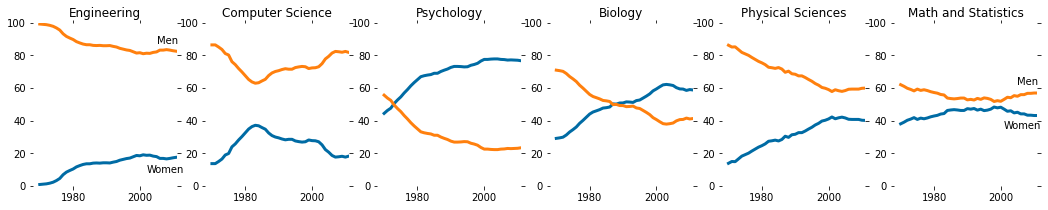

In [9]:
fig = plt.figure(figsize=(18, 3))

for sp in range(0,6):
    ax = fig.add_subplot(1,6,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    
    # Add text annotations in the leftmost chart
    if sp == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    # Add text annotations in the rightmost chart
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')
plt.show()



---

In this mission, we learned how to improve the viewing experience by making our plots more color-blind friendly and thickening the line widths. We then explored how to use the layout and ordering of the plots as well annotations directly onto the plots to enhance the story that's being told to the viewer. Next in this course is a guided project, where we'll extend the work we did in this mission to all of the degree categories.
